In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

# Загрузка и первичный анализ данных

In [2]:
# Будем использовать только обучающую выборку
data = pd.read_csv('Animated_Tv_Series.csv', sep=",",  encoding='latin-1')

In [3]:
# размер набора данных
data.shape

(1816, 10)

In [4]:
# типы колонок
data.dtypes

Id                    int64
Title                object
Episodes            float64
Year                 object
Original channel     object
American company     object
Note                 object
Technique            object
IMDb                float64
Google users         object
dtype: object

In [5]:
# проверим есть ли пропущенные значения
data.isnull().sum()

Id                     0
Title                  0
Episodes              18
Year                   0
Original channel       7
American company      45
Note                1328
Technique              0
IMDb                   4
Google users           4
dtype: int64

In [6]:
# Первые 5 строк датасета
data.head()

,Id,Title,Episodes,Year,Original channel,American company,Note,Technique,IMDb,Google users
0,1,2 Stupid Dogs,26.0,1993-1995,TBS,Hanna-Barbera,NaN,Traditional,7.2,91%
1,2,3-2-1 Penguins!,27.0,2000-2008,Direct to video,Big Idea Productions,NaN,CGI,6.5,91%
2,3,3-South,13.0,2002-2003,MTV,Warner Bros. AnimationMTV Animation,NaN,Traditional,8.0,87%
3,4,3Below: Tales of Arcadia,28.0,2018-2019,Netflix,DreamWorks Animation Television,NaN,CGI,7.6,77%
4,5,3rd & Bird,51.0,2008-2010,Playhouse Disney,Little Airplane Productions,British co-production,Flash,7.8,92%


In [7]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 1816


# Обработка пропусков в данных
Простые стратегии - удаление или заполнение нулями
Удаление колонок, содержащих пустые значения res = data.dropna(axis=1, how='any')

Удаление строк, содержащих пустые значения res = data.dropna(axis=0, how='any')

Удаление может производиться для группы строк или колонок.

In [8]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((1816, 10), (1816, 4))

In [9]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((1816, 10), (474, 10))

In [10]:
data.head()

,Id,Title,Episodes,Year,Original channel,American company,Note,Technique,IMDb,Google users
0,1,2 Stupid Dogs,26.0,1993-1995,TBS,Hanna-Barbera,NaN,Traditional,7.2,91%
1,2,3-2-1 Penguins!,27.0,2000-2008,Direct to video,Big Idea Productions,NaN,CGI,6.5,91%
2,3,3-South,13.0,2002-2003,MTV,Warner Bros. AnimationMTV Animation,NaN,Traditional,8.0,87%
3,4,3Below: Tales of Arcadia,28.0,2018-2019,Netflix,DreamWorks Animation Television,NaN,CGI,7.6,77%
4,5,3rd & Bird,51.0,2008-2010,Playhouse Disney,Little Airplane Productions,British co-production,Flash,7.8,92%


In [11]:
# Заполнение всех пропущенных значений нулями
# В данном случае это некорректно, так как нулями заполняются в том числе категориальные колонки
data_new_3 = data.fillna(0)
data_new_3.head()

,Id,Title,Episodes,Year,Original channel,American company,Note,Technique,IMDb,Google users
0,1,2 Stupid Dogs,26.0,1993-1995,TBS,Hanna-Barbera,0,Traditional,7.2,91%
1,2,3-2-1 Penguins!,27.0,2000-2008,Direct to video,Big Idea Productions,0,CGI,6.5,91%
2,3,3-South,13.0,2002-2003,MTV,Warner Bros. AnimationMTV Animation,0,Traditional,8.0,87%
3,4,3Below: Tales of Arcadia,28.0,2018-2019,Netflix,DreamWorks Animation Television,0,CGI,7.6,77%
4,5,3rd & Bird,51.0,2008-2010,Playhouse Disney,Little Airplane Productions,British co-production,Flash,7.8,92%


"Внедрение значений" - импьютация (imputation)

# Обработка пропусков в числовых данных

In [13]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Episodes. Тип данных float64. Количество пустых значений 18, 0.99%.
Колонка IMDb. Тип данных float64. Количество пустых значений 4, 0.22%.


In [14]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,Episodes,IMDb
0,26.0,7.2
1,27.0,6.5
2,13.0,8.0
3,28.0,7.6
4,51.0,7.8
...,...,...
1811,26.0,5.5
1812,65.0,7.6
1813,12.0,6.8
1814,6.0,6.8


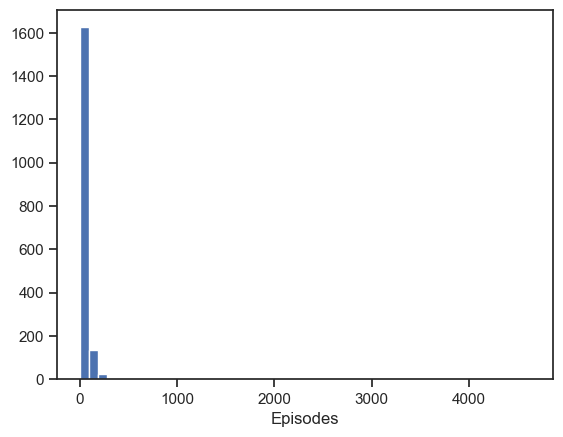

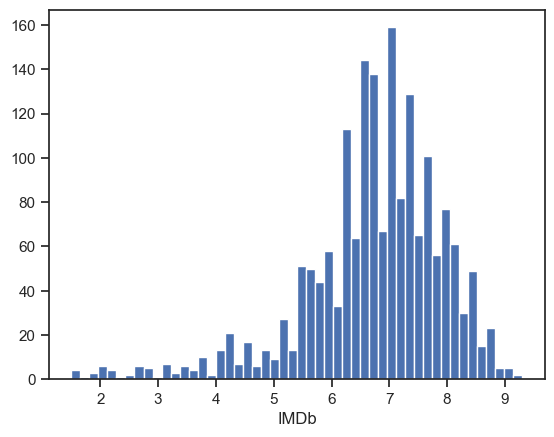

In [15]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [111]:
data_num_MasVnrArea = data_num[['Episodes']]
data_num_MasVnrArea.head()

,Episodes
0,26.0
1,27.0
2,13.0
3,28.0
4,51.0


In [17]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [18]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_MasVnrArea)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [19]:
strategies=['mean', 'median', 'most_frequent']

In [20]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_MasVnrArea)
    return data_num_imp[mask_missing_values_only]

In [21]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([45.36651835, 45.36651835, 45.36651835, 45.36651835, 45.36651835,
        45.36651835, 45.36651835, 45.36651835, 45.36651835, 45.36651835,
        45.36651835, 45.36651835, 45.36651835, 45.36651835, 45.36651835,
        45.36651835, 45.36651835, 45.36651835]))

In [22]:
strategies[1], test_num_impute(strategies[1])

('median',
 array([26., 26., 26., 26., 26., 26., 26., 26., 26., 26., 26., 26., 26.,
        26., 26., 26., 26., 26.]))

In [23]:
strategies[2], test_num_impute(strategies[2])

('most_frequent',
 array([26., 26., 26., 26., 26., 26., 26., 26., 26., 26., 26., 26., 26.,
        26., 26., 26., 26., 26.]))

In [24]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [25]:
data[['IMDb']].describe()

,IMDb
count,1812.000000
mean,6.712031
std,1.228804
min,1.500000
25%,6.200000
50%,6.900000
75%,7.500000
max,9.300000


In [26]:
test_num_impute_col(data, 'IMDb', strategies[0])

('IMDb', 'mean', 4, 6.712030905077263, 6.712030905077263)

In [27]:
test_num_impute_col(data, 'IMDb', strategies[1])

('IMDb', 'median', 4, 6.9, 6.9)

In [28]:
test_num_impute_col(data, 'IMDb', strategies[2])

('IMDb', 'most_frequent', 4, 7.2, 7.2)

# Обработка пропусков в категориальных данных

In [29]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Original channel. Тип данных object. Количество пустых значений 7, 0.39%.
Колонка American company. Тип данных object. Количество пустых значений 45, 2.48%.
Колонка Note. Тип данных object. Количество пустых значений 1328, 73.13%.
Колонка Google users. Тип данных object. Количество пустых значений 4, 0.22%.


In [30]:
cat_temp_data = data[['American company']]
cat_temp_data.head()

,American company
0,Hanna-Barbera
1,Big Idea Productions
2,Warner Bros. AnimationMTV Animation
3,DreamWorks Animation Television
4,Little Airplane Productions


In [31]:
cat_temp_data['American company'].unique()

array(['Hanna-Barbera', 'Big Idea Productions',
       'Warner Bros. AnimationMTV Animation',
       'DreamWorks Animation Television', 'Little Airplane Productions',
       'Disney Television Animation', 'Williams Street',
       'Jumbo PicturesDisney Television Animation',
       'Klasky CsupoGames Animation', 'Sesame Workshop', nan,
       'Nickelodeon Animation Studio', 'DIC Entertainment',
       'Netflix Animation', 'ADHD Studios',
       'Frederator StudiosCartoon Network Studios',
       'PorchLight Entertainment', 'Filmation', 'MTV Animation',
       'Hyperion Animation',
       'O EntertainmentDNA ProductionsNickelodeon Animation Studio',
       "Schneider's BakeryNickelodeon Animation Studio", 'Tempe-Toons',
       'CBS Entertainment Productions', 'Jay Ward Productions',
       'Beverly Hills Productions', 'Walt Disney Television Animation',
       'Sony Pictures Animation', 'Stoopid Buddy Stoodios',
       'Reverse Engineering Studios', 'Broadway Video', 'MGM Animation',
  

In [113]:
cat_temp_data[cat_temp_data['American company'].isnull()].shape

(45, 1)

In [33]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['Hanna-Barbera'],
       ['Big Idea Productions'],
       ['Warner Bros. AnimationMTV Animation'],
       ...,
       ['icebox.com'],
       ['Walt Disney Animation Studios'],
       ['The Hatchery']], dtype=object)

In [34]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['3 Arts Entertainment', '41 Entertainment',
       '41 EntertainmentSprite Animation Studios', '4Kids Entertainment',
       '6 Point Harness', '9 Story USA', 'A&E Studios',
       'ABS-CBN International', 'ADHD Studios',
       'Abrams/Gentile Entertainment', 'ActionFliks Media Corporation',
       'Activision Blizzard Studios', 'Adelaide Productions',
       'Adelaide ProductionsIdbox', 'Adventure Cartoon Productions',
       'Agnew Jorné Productions', 'Alcon Entertainment', 'Allspark',
       'Amazon Studios', 'Amazon Studios9 Story USA',
       'Amazon StudiosBix Pix Entertainment',
       'Amazon StudiosOut of the Blue Enterprises', 'Amblimation',
       'Amblin Television', 'American Greetings', 'Animation Associates',
       'Animation Collective', 'Animax Entertainment',
       'Animax EntertainmentMTV Animation', 'Annoying Orange, Inc.',
       'Associated Studios', 'Atkinson Film-Arts',
       'Atlantic/Kushner-Locke', 'Atomic Cartoons', 'Augenblick Studios',
       'B

In [35]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['Hanna-Barbera'],
       ['Big Idea Productions'],
       ['Warner Bros. AnimationMTV Animation'],
       ...,
       ['icebox.com'],
       ['Walt Disney Animation Studios'],
       ['The Hatchery']], dtype=object)

In [36]:
np.unique(data_imp3)

array(['3 Arts Entertainment', '41 Entertainment',
       '41 EntertainmentSprite Animation Studios', '4Kids Entertainment',
       '6 Point Harness', '9 Story USA', 'A&E Studios',
       'ABS-CBN International', 'ADHD Studios',
       'Abrams/Gentile Entertainment', 'ActionFliks Media Corporation',
       'Activision Blizzard Studios', 'Adelaide Productions',
       'Adelaide ProductionsIdbox', 'Adventure Cartoon Productions',
       'Agnew Jorné Productions', 'Alcon Entertainment', 'Allspark',
       'Amazon Studios', 'Amazon Studios9 Story USA',
       'Amazon StudiosBix Pix Entertainment',
       'Amazon StudiosOut of the Blue Enterprises', 'Amblimation',
       'Amblin Television', 'American Greetings', 'Animation Associates',
       'Animation Collective', 'Animax Entertainment',
       'Animax EntertainmentMTV Animation', 'Annoying Orange, Inc.',
       'Associated Studios', 'Atkinson Film-Arts',
       'Atlantic/Kushner-Locke', 'Atomic Cartoons', 'Augenblick Studios',
       'B

In [114]:
data_imp3[data_imp3=='NA'].size

45

# Преобразование категориальных признаков в числовые

In [38]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,Hanna-Barbera
1,Big Idea Productions
2,Warner Bros. AnimationMTV Animation
3,DreamWorks Animation Television
4,Little Airplane Productions
...,...
1811,Cepia LLC
1812,Maryland Public Television
1813,icebox.com
1814,Walt Disney Animation Studios


# Кодирование категорий целочисленными значениями (label encoding)

## Использование LabelEncoder

In [47]:
from sklearn.preprocessing import LabelEncoder

In [51]:
cat_enc['c1'].unique()

array(['Hanna-Barbera', 'Big Idea Productions',
       'Warner Bros. AnimationMTV Animation',
       'DreamWorks Animation Television', 'Little Airplane Productions',
       'Disney Television Animation', 'Williams Street',
       'Jumbo PicturesDisney Television Animation',
       'Klasky CsupoGames Animation', 'Sesame Workshop',
       'Nickelodeon Animation Studio', 'DIC Entertainment',
       'Netflix Animation', 'ADHD Studios',
       'Frederator StudiosCartoon Network Studios',
       'PorchLight Entertainment', 'Filmation', 'MTV Animation',
       'Hyperion Animation',
       'O EntertainmentDNA ProductionsNickelodeon Animation Studio',
       "Schneider's BakeryNickelodeon Animation Studio", 'Tempe-Toons',
       'CBS Entertainment Productions', 'Jay Ward Productions',
       'Beverly Hills Productions', 'Walt Disney Television Animation',
       'Sony Pictures Animation', 'Stoopid Buddy Stoodios',
       'Reverse Engineering Studios', 'Broadway Video', 'MGM Animation',
       

In [116]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [57]:
# Наименования категорий в соответствии с порядковыми номерами

# Свойство называется classes, потому что предполагается что мы решаем 
# задачу классификации и каждое значение категории соответствует 
# какому-либо классу целевого признака

le.classes_

array(['3 Arts Entertainment', '41 Entertainment',
       '41 EntertainmentSprite Animation Studios', '4Kids Entertainment',
       '6 Point Harness', '9 Story USA', 'A&E Studios',
       'ABS-CBN International', 'ADHD Studios',
       'Abrams/Gentile Entertainment', 'ActionFliks Media Corporation',
       'Activision Blizzard Studios', 'Adelaide Productions',
       'Adelaide ProductionsIdbox', 'Adventure Cartoon Productions',
       'Agnew Jorné Productions', 'Alcon Entertainment', 'Allspark',
       'Amazon Studios', 'Amazon Studios9 Story USA',
       'Amazon StudiosBix Pix Entertainment',
       'Amazon StudiosOut of the Blue Enterprises', 'Amblimation',
       'Amblin Television', 'American Greetings', 'Animation Associates',
       'Animation Collective', 'Animax Entertainment',
       'Animax EntertainmentMTV Animation', 'Annoying Orange, Inc.',
       'Associated Studios', 'Atkinson Film-Arts',
       'Atlantic/Kushner-Locke', 'Atomic Cartoons', 'Augenblick Studios',
       'B

In [60]:
cat_enc_le

array([177,  48, 482, ..., 504, 470, 425])

In [62]:
np.unique(cat_enc_le)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [64]:
# В этом примере видно, что перед кодированием 
# уникальные значения признака сортируются в лексикографиеском порядке
le.inverse_transform([0, 1, 2, 3])

array(['3 Arts Entertainment', '41 Entertainment',
       '41 EntertainmentSprite Animation Studios', '4Kids Entertainment'],
      dtype=object)

## Использование OrdinalEncoder

In [65]:
from sklearn.preprocessing import OrdinalEncoder

In [66]:
data_oe = data[['American company', 'Note', 'Original channel']]
data_oe.head()

,American company,Note,Original channel
0,Hanna-Barbera,NaN,TBS
1,Big Idea Productions,NaN,Direct to video
2,Warner Bros. AnimationMTV Animation,NaN,MTV
3,DreamWorks Animation Television,NaN,Netflix
4,Little Airplane Productions,British co-production,Playhouse Disney


In [67]:
imp4 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_oe_filled = imp4.fit_transform(data_oe)
data_oe_filled

array([['Hanna-Barbera', 'NA', 'TBS'],
       ['Big Idea Productions', 'NA', 'Direct to video'],
       ['Warner Bros. AnimationMTV Animation', 'NA', 'MTV'],
       ...,
       ['icebox.com', 'NA', 'NA'],
       ['Walt Disney Animation Studios', 'NA', 'Disney+'],
       ['The Hatchery', 'NA', 'PBS Kids']], dtype=object)

In [68]:
oe = OrdinalEncoder()
cat_enc_oe = oe.fit_transform(data_oe_filled)
cat_enc_oe

array([[177.,  67., 182.],
       [ 48.,  67.,  52.],
       [483.,  67., 114.],
       ...,
       [505.,  67., 125.],
       [471.,  67.,  66.],
       [426.,  67., 144.]])

In [69]:
# Уникальные значения 1 признака
np.unique(cat_enc_oe[:, 0])

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [70]:
# Уникальные значения 2 признака
np.unique(cat_enc_oe[:, 1])

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100.])

In [73]:
# Уникальные значения 3 признака
np.unique(cat_enc_oe[:, 2])

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [74]:
# Наименования категорий в соответствии с порядковыми номерами
oe.categories_

[array(['3 Arts Entertainment', '41 Entertainment',
        '41 EntertainmentSprite Animation Studios', '4Kids Entertainment',
        '6 Point Harness', '9 Story USA', 'A&E Studios',
        'ABS-CBN International', 'ADHD Studios',
        'Abrams/Gentile Entertainment', 'ActionFliks Media Corporation',
        'Activision Blizzard Studios', 'Adelaide Productions',
        'Adelaide ProductionsIdbox', 'Adventure Cartoon Productions',
        'Agnew Jorné Productions', 'Alcon Entertainment', 'Allspark',
        'Amazon Studios', 'Amazon Studios9 Story USA',
        'Amazon StudiosBix Pix Entertainment',
        'Amazon StudiosOut of the Blue Enterprises', 'Amblimation',
        'Amblin Television', 'American Greetings', 'Animation Associates',
        'Animation Collective', 'Animax Entertainment',
        'Animax EntertainmentMTV Animation', 'Annoying Orange, Inc.',
        'Associated Studios', 'Atkinson Film-Arts',
        'Atlantic/Kushner-Locke', 'Atomic Cartoons', 'Augenblick Stu

In [77]:
# Обратное преобразование
oe.inverse_transform(cat_enc_oe)

array([['Hanna-Barbera', 'NA', 'TBS'],
       ['Big Idea Productions', 'NA', 'Direct to video'],
       ['Warner Bros. AnimationMTV Animation', 'NA', 'MTV'],
       ...,
       ['icebox.com', 'NA', 'NA'],
       ['Walt Disney Animation Studios', 'NA', 'Disney+'],
       ['The Hatchery', 'NA', 'PBS Kids']], dtype=object)

## Кодирование шкал порядка

In [78]:
# пример шкалы порядка 'small' < 'medium' < 'large'
sizes = ['small', 'medium', 'large', 'small', 'medium', 'large', 'small', 'medium', 'large']

In [81]:
pd_sizes = pd.DataFrame(data={'sizes':sizes})
pd_sizes

,sizes
0,small
1,medium
2,large
3,small
4,medium
5,large
6,small
7,medium
8,large


In [82]:
pd_sizes['sizes_codes'] = pd_sizes['sizes'].map({'small':1, 'medium':2, 'large':3})
pd_sizes

,sizes,sizes_codes
0,small,1
1,medium,2
2,large,3
3,small,1
4,medium,2
5,large,3
6,small,1
7,medium,2
8,large,3


In [83]:
pd_sizes['sizes_decoded'] = pd_sizes['sizes_codes'].map({1:'small', 2:'medium', 3:'large'})
pd_sizes

,sizes,sizes_codes,sizes_decoded
0,small,1,small
1,medium,2,medium
2,large,3,large
3,small,1,small
4,medium,2,medium
5,large,3,large
6,small,1,small
7,medium,2,medium
8,large,3,large


## Кодирование категорий наборами бинарных значений - one-hot encoding

В этом случае каждое уникальное значение признака становится новым отдельным признаком.

In [84]:
from sklearn.preprocessing import OneHotEncoder

In [87]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [90]:
cat_enc.shape

(1816, 1)

In [92]:
cat_enc_ohe.shape

(1816, 505)

In [94]:
cat_enc_ohe

<1816x505 sparse matrix of type '<class 'numpy.float64'>'
	with 1816 stored elements in Compressed Sparse Row format>

In [96]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [98]:
cat_enc.head(10)

,c1
0,Hanna-Barbera
1,Big Idea Productions
2,Warner Bros. AnimationMTV Animation
3,DreamWorks Animation Television
4,Little Airplane Productions
5,Disney Television Animation
6,Williams Street
7,Hanna-Barbera
8,Jumbo PicturesDisney Television Animation
9,Klasky CsupoGames Animation


Pandas get_dummies - быстрый вариант one-hot кодирования

In [99]:
pd.get_dummies(cat_enc).head()

,c1_3 Arts Entertainment,c1_41 Entertainment,c1_41 EntertainmentSprite Animation Studios,c1_4Kids Entertainment,c1_6 Point Harness,c1_9 Story USA,c1_A&E Studios,c1_ABS-CBN International,c1_ADHD Studios,c1_Abrams/Gentile Entertainment,...,c1_Wilo Productions,"c1_Wind Dancer Films\r\nSnee-Oosh, Inc.",c1_World Events Productions,c1_World Famous Pictures,c1_YouTube Originals,c1_YouTube Studio,c1_Zafari Productions,c1_Zodiac Entertainment,c1_a.k.a. Cartoon,c1_icebox.com
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [100]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,American company_3 Arts Entertainment,American company_41 Entertainment,American company_41 EntertainmentSprite Animation Studios,American company_4Kids Entertainment,American company_6 Point Harness,American company_9 Story USA,American company_A&E Studios,American company_ABS-CBN International,American company_ADHD Studios,American company_Abrams/Gentile Entertainment,...,"American company_Wind Dancer Films\r\nSnee-Oosh, Inc.",American company_World Events Productions,American company_World Famous Pictures,American company_YouTube Originals,American company_YouTube Studio,American company_Zafari Productions,American company_Zodiac Entertainment,American company_a.k.a. Cartoon,American company_icebox.com,American company_nan
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Масштабирование данных

In [101]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [104]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['IMDb']])

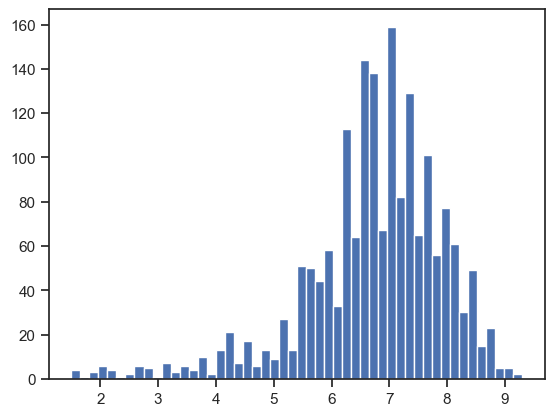

In [105]:
plt.hist(data['IMDb'], 50)
plt.show()

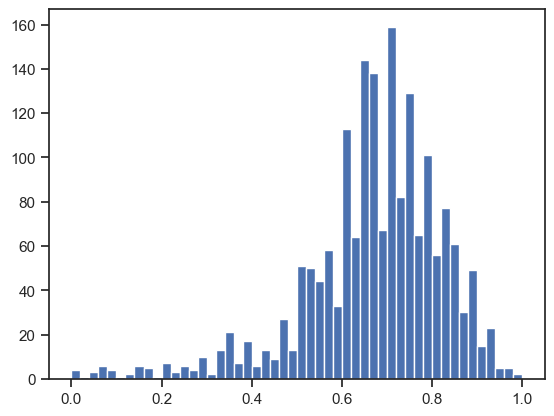

In [106]:
plt.hist(sc1_data, 50)
plt.show()

## Масштабирование данных на основе Z-оценки - StandardScaler

In [107]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['IMDb']])

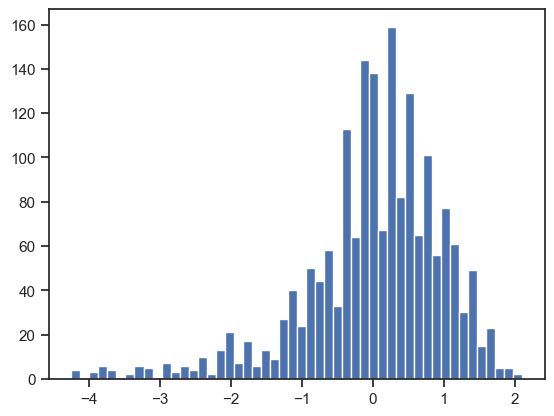

In [108]:
plt.hist(sc2_data, 50)
plt.show()